In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Step 2: Simulate Dataset
np.random.seed(42)
n = 200
age = np.random.randint(20, 60, n)
income = np.random.randint(30000, 120000, n)


In [ ]:
# Conditional target generation
buy = np.where(age > 30,
               np.random.choice([1, 0], n, p=[0.7, 0.3]),
               np.random.choice([1, 0], n, p=[0.3, 0.7]))

df = pd.DataFrame({'Age': age, 'Income': income, 'Buy_House': buy})

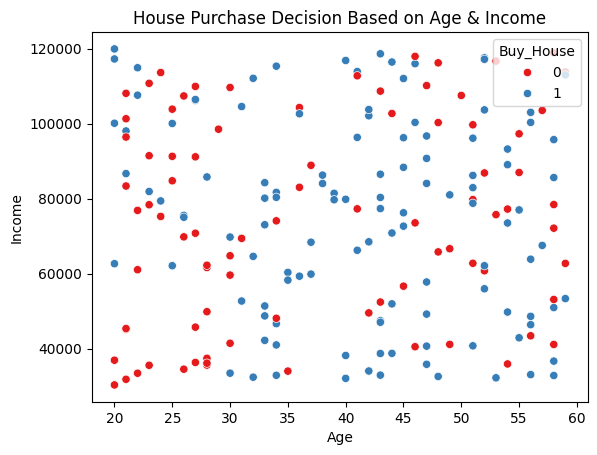

In [ ]:
# Step 3: Visualize
sns.scatterplot(data=df, x='Age', y='Income', hue='Buy_House', palette='Set1')
plt.title("House Purchase Decision Based on Age & Income")
plt.show()

In [ ]:
# Step 4: Train-Test Split
X = df[['Age', 'Income']]
y = df['Buy_House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
# Step 5: Train Decision Tree
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Step 6: Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.37      0.44        19
           1       0.68      0.81      0.74        31

    accuracy                           0.64        50
   macro avg       0.61      0.59      0.59        50
weighted avg       0.62      0.64      0.62        50



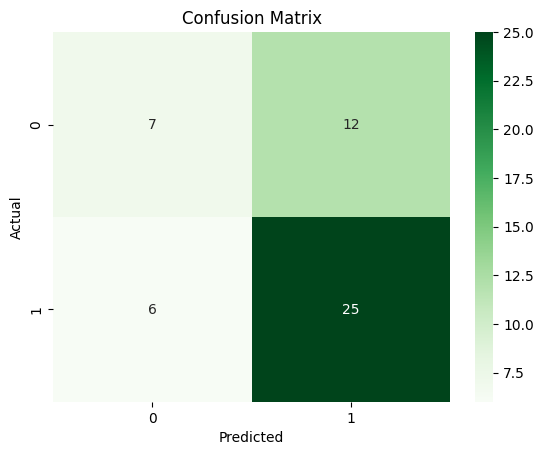

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

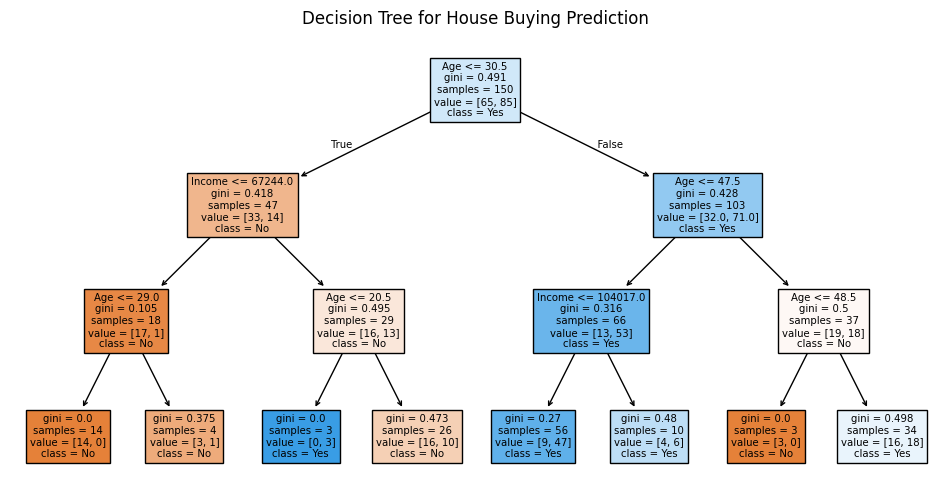

In [ ]:
# Step 7: Visualize Tree
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=["Age", "Income"], class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree for House Buying Prediction")
plt.show()